In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# (1) Используя параметры read_csv из pandas прочитать файл csv так,
# чтобы данные были разбиты по соответствующим колонкам 
# (а не все слилось в одну)
df = pd.read_csv('UCI_Credit_Card.csv') # нет необходимости использовать доп. параметры

In [6]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)

In [8]:
df.info() # пропуски отсутствуют

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [9]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [10]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [11]:
df.AGE.std()

9.217904068090188

In [12]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

df[df['EDUCATION']==2].groupby('SEX').count()['EDUCATION'][2]
# 8656 женщин с университетским образованием

8656

In [13]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
nec_cols = [x for x in df.columns if x.startswith('BILL_') or \
                 x.startswith('PAY_') or x=='default.payment.next.month']
df[nec_cols].groupby('default.payment.next.month').median()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,23119.5,21660.5,20202.5,19000.0,17998.0,16679.0,2459.5,2247.5,2000.0,1734.0,1765.0,1706.0
1,1,0,0,0,0,0,20185.0,20300.5,19834.5,19119.5,18478.5,18028.5,1636.0,1533.5,1222.0,1000.0,1000.0,1000.0


In [43]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

df.pivot_table(columns=['SEX', 'EDUCATION', 'MARRIAGE'], aggfunc='count')['ID']

SEX  EDUCATION  MARRIAGE
1    0          1              2
                2              6
     1          0              1
                1           1690
                2           2633
                3             30
     2          0              1
                1           2370
                2           2940
                3             63
     3          0             12
                1           1048
                2            894
                3             36
     4          1             18
                2             23
                3              1
     5          1             48
                2             46
                3              1
     6          1             14
                2             11
2    0          1              2
                2              4
     1          0              3
                1           2032
                2           4176
                3             20
     2          0              5
                1 

In [44]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

def cat_func(x):
    if x > 700000:
        return 'F'
    elif x > 400000:
        return 'E'
    elif x > 200000:
        return 'D'
    elif x > 100000:
        return 'C'
    elif x > 10000:
        return 'B'
    elif x > 0:
        return 'A'
    else:
        return None
    
    
df['cat'] = df['LIMIT_BAL'].apply(cat_func)


In [45]:
%matplotlib inline

In [46]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)

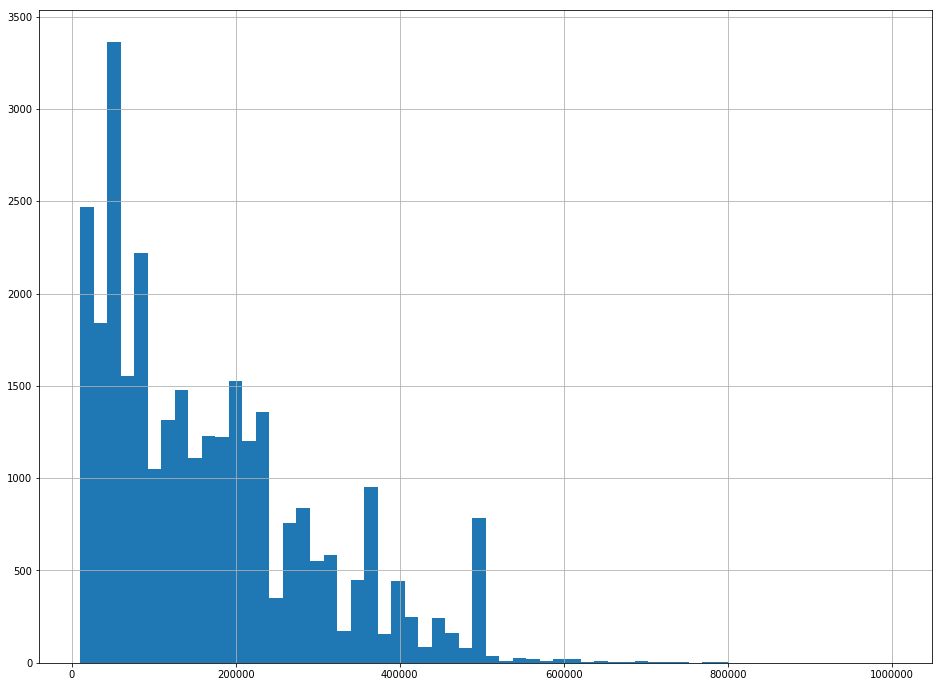

In [47]:
plt.figure(figsize=(16,12))
df.LIMIT_BAL.hist(bins=60)
plt.show();

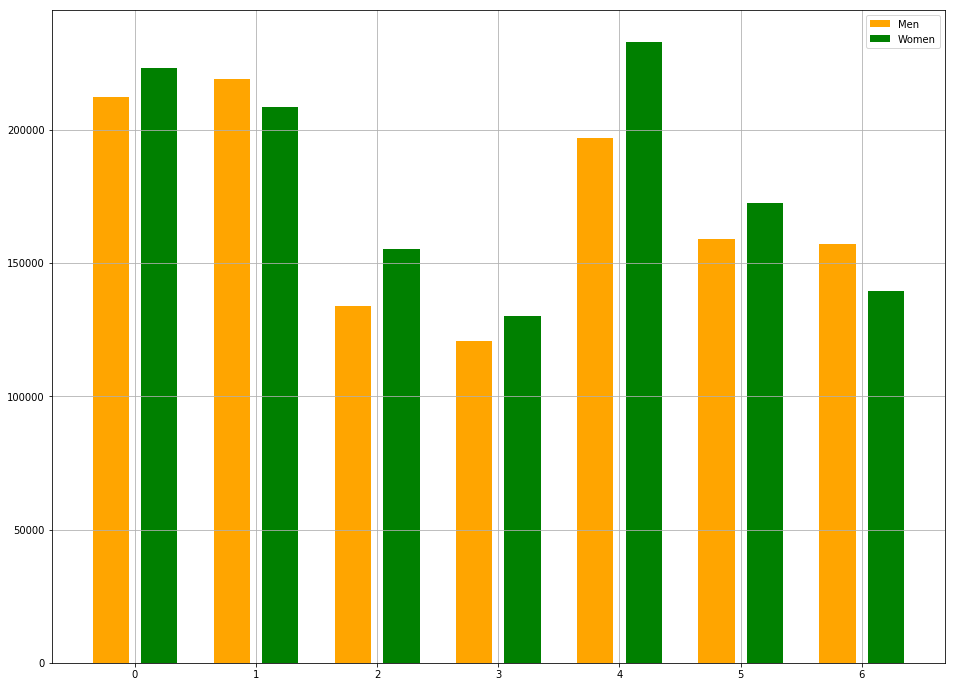

In [48]:
# (8) построить среднее значение кредитного лимита для каждого вида образования 
# и для каждого пола
# график необходимо сделать очень широким (на весь экран)
avg_lim = df.groupby(['SEX', 'EDUCATION']).mean()['LIMIT_BAL']
avg_lim = pd.DataFrame(avg_lim).reset_index()

plt.figure(figsize=(16,12))
plt.grid()
plt.bar(x=avg_lim[avg_lim.SEX==1].EDUCATION-0.2, 
        height=avg_lim[avg_lim.SEX==1].LIMIT_BAL, 
        color='orange', width=0.3, label='Men')
plt.bar(x=avg_lim[avg_lim.SEX==2].EDUCATION+0.2, 
        height=avg_lim[avg_lim.SEX==2].LIMIT_BAL, 
        color='g', width=0.3, label='Women')
plt.legend()
plt.show();

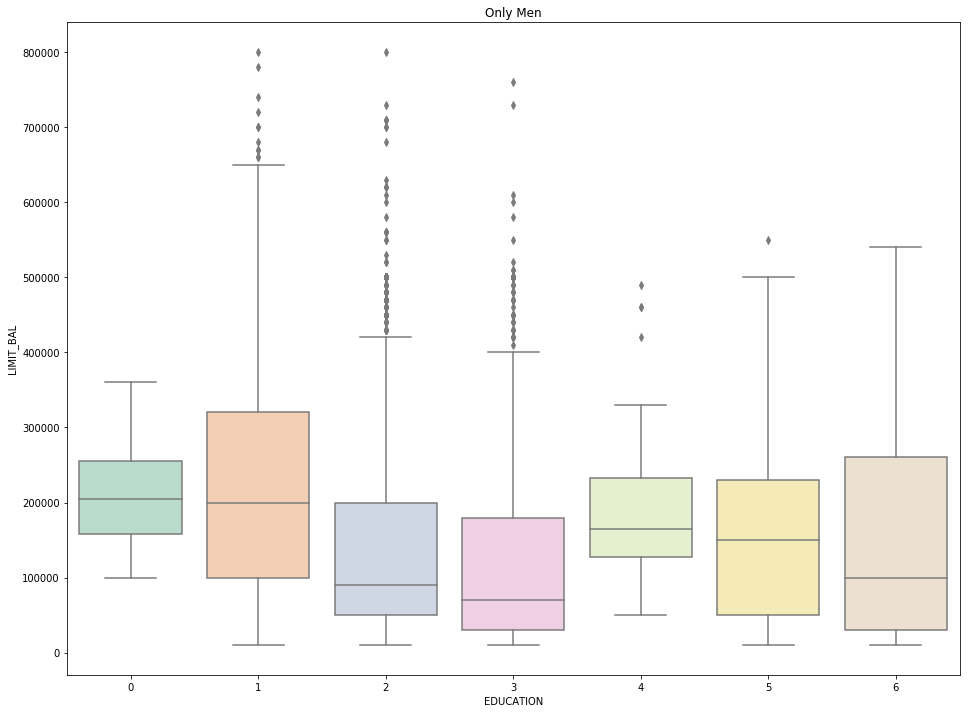

In [49]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов
plt.figure(figsize=(16,12))
rel_df = df[df.SEX==1][['LIMIT_BAL', 'EDUCATION']]
sns.boxplot(x=rel_df.EDUCATION, y=rel_df.LIMIT_BAL, palette="Pastel2")
plt.title('Only Men')
plt.show()

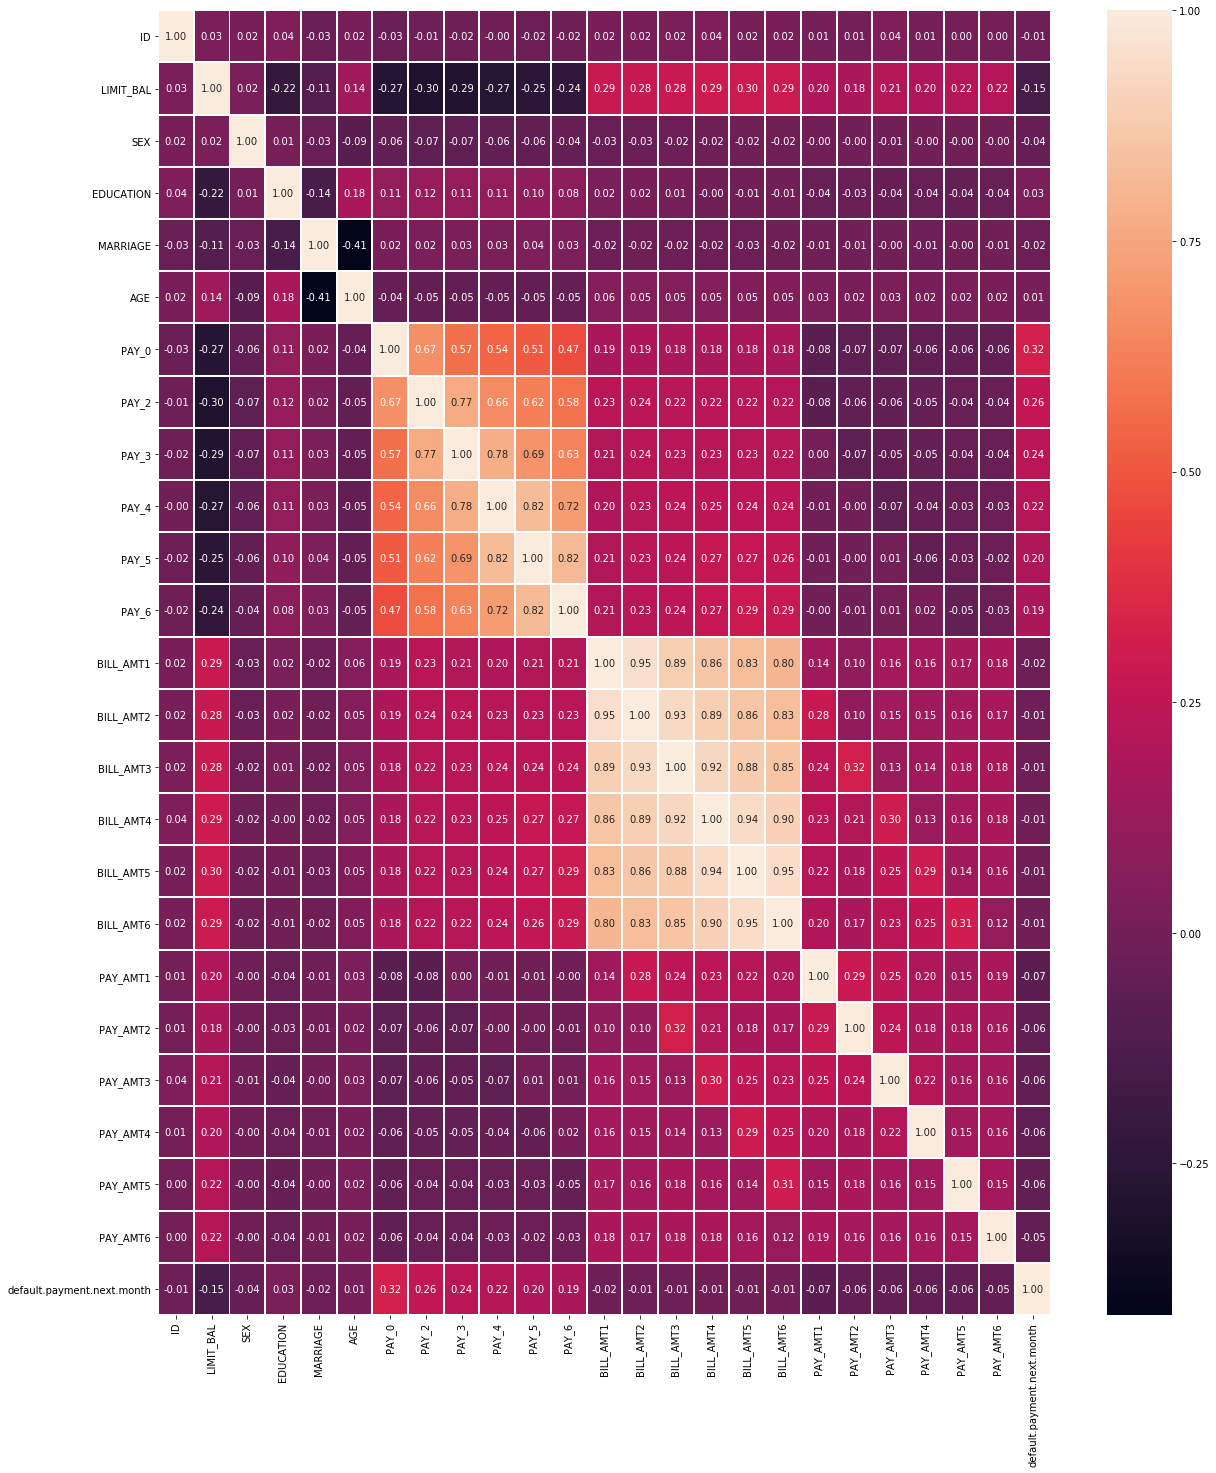

In [50]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)

import seaborn as sns
plt.figure(figsize=(20,24))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=1, square=False)
plt.show();

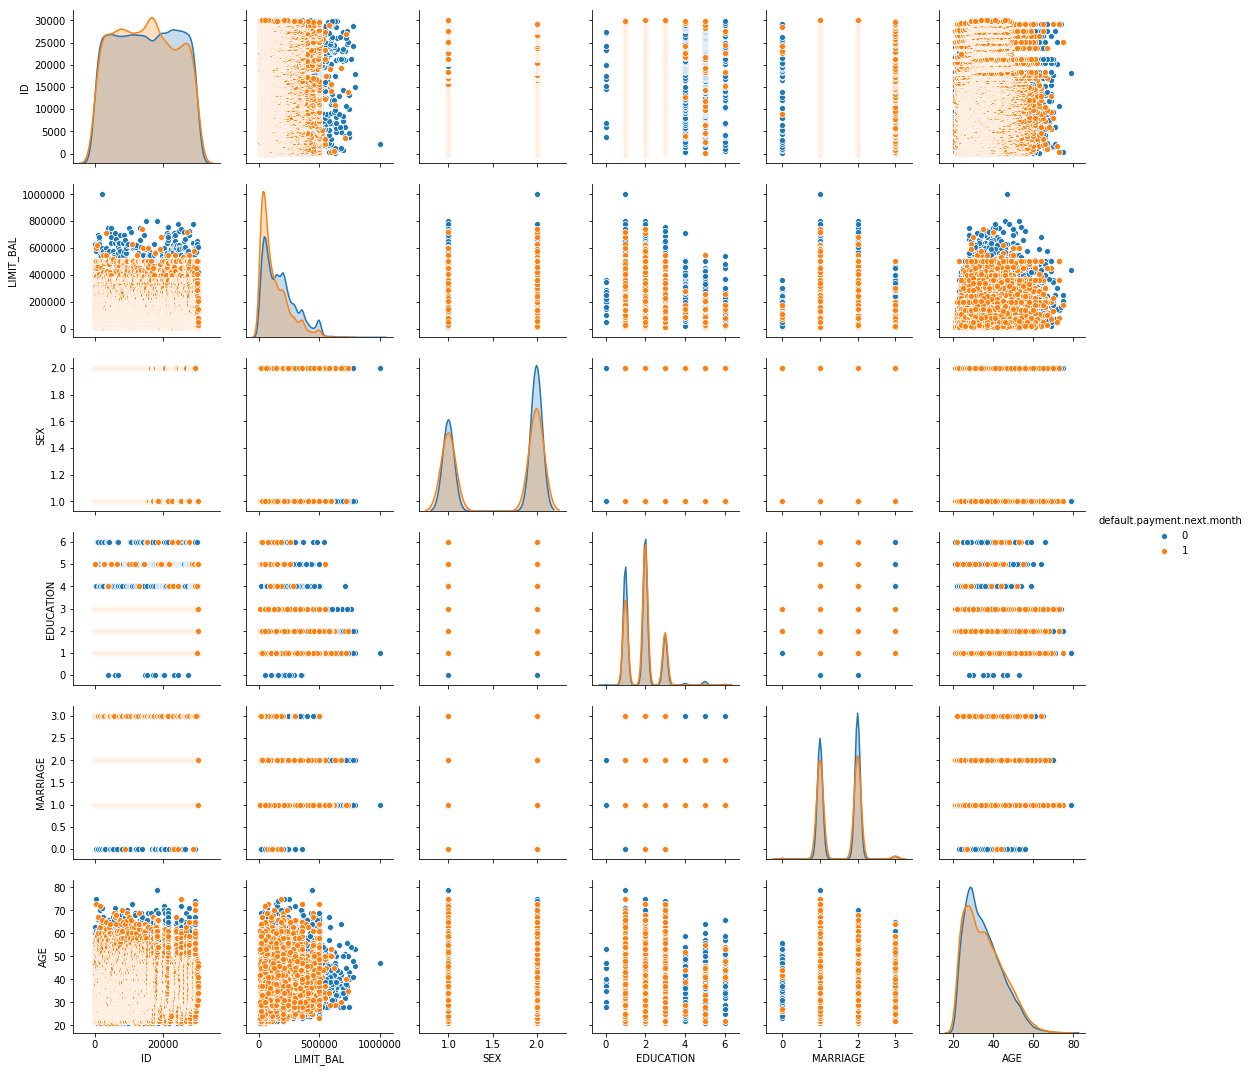

In [51]:
sns.pairplot(df, vars=['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], 
             hue='default.payment.next.month')
plt.show();

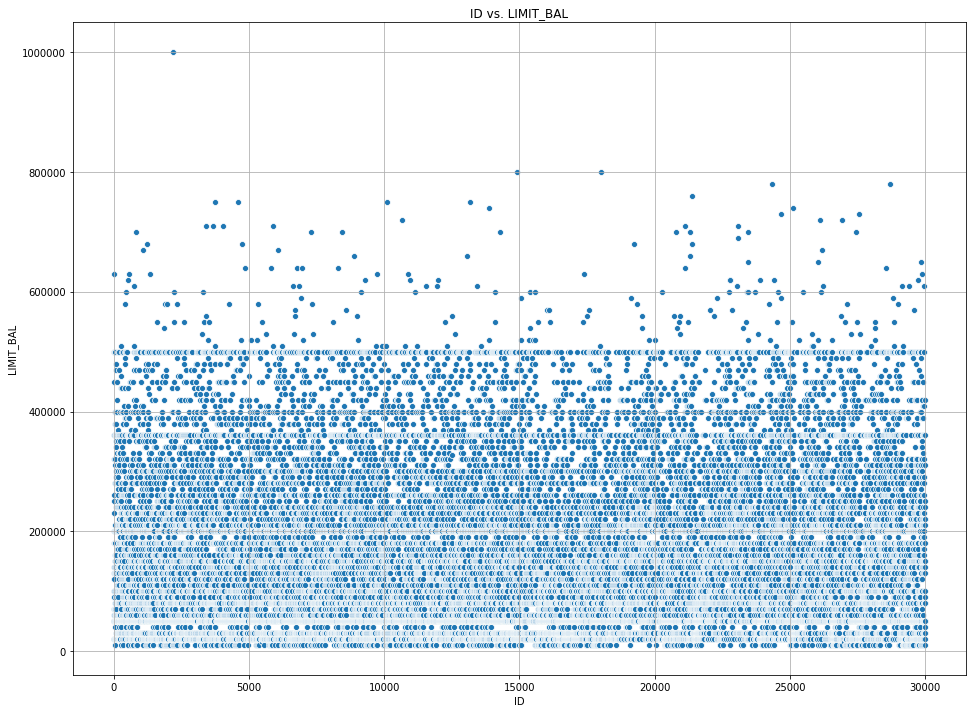

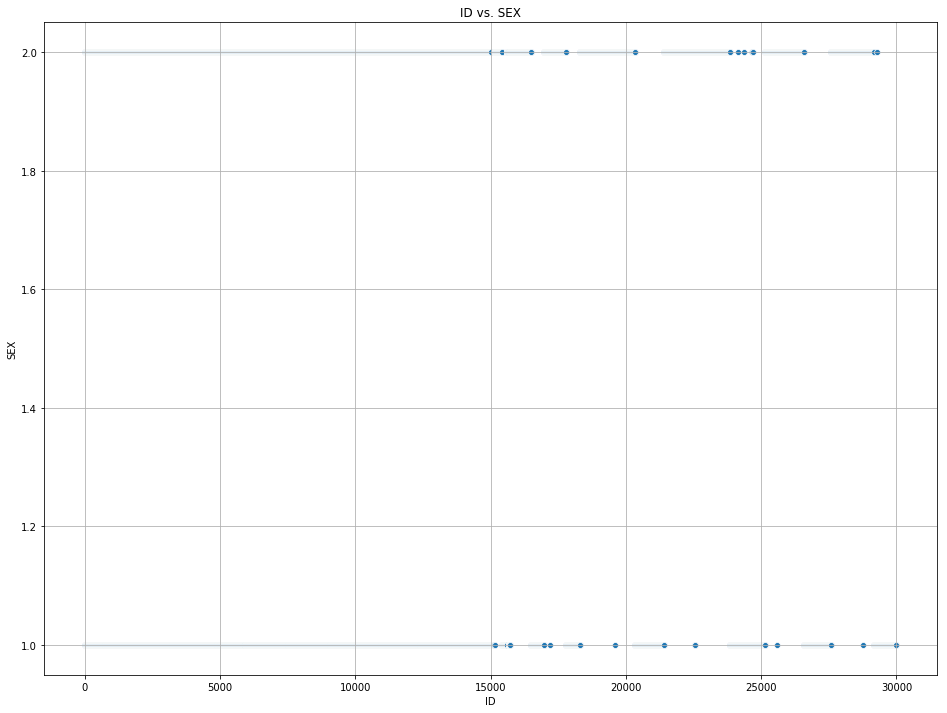

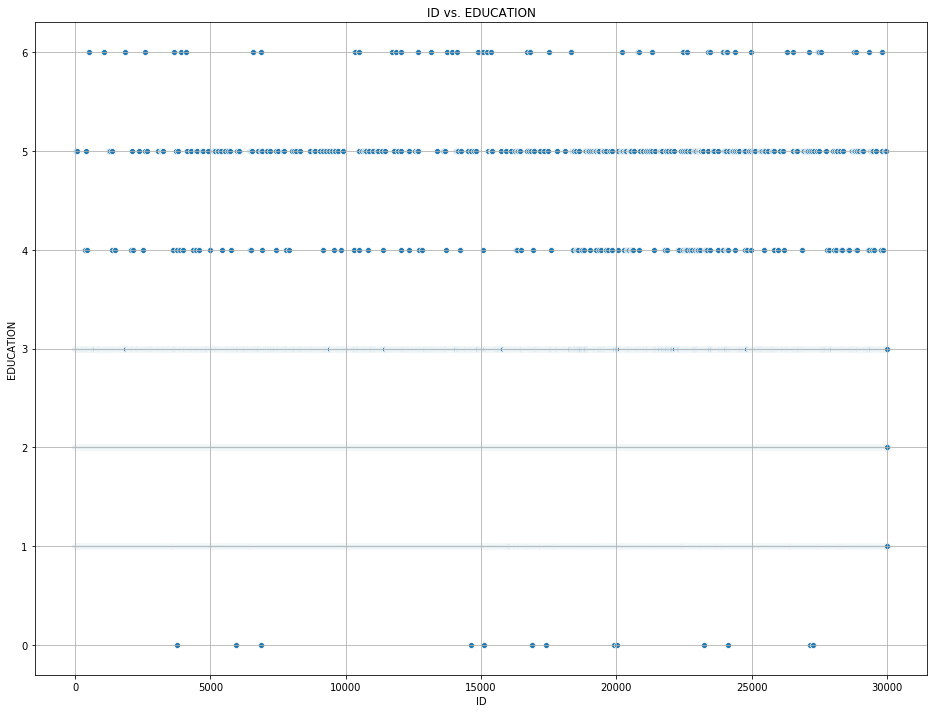

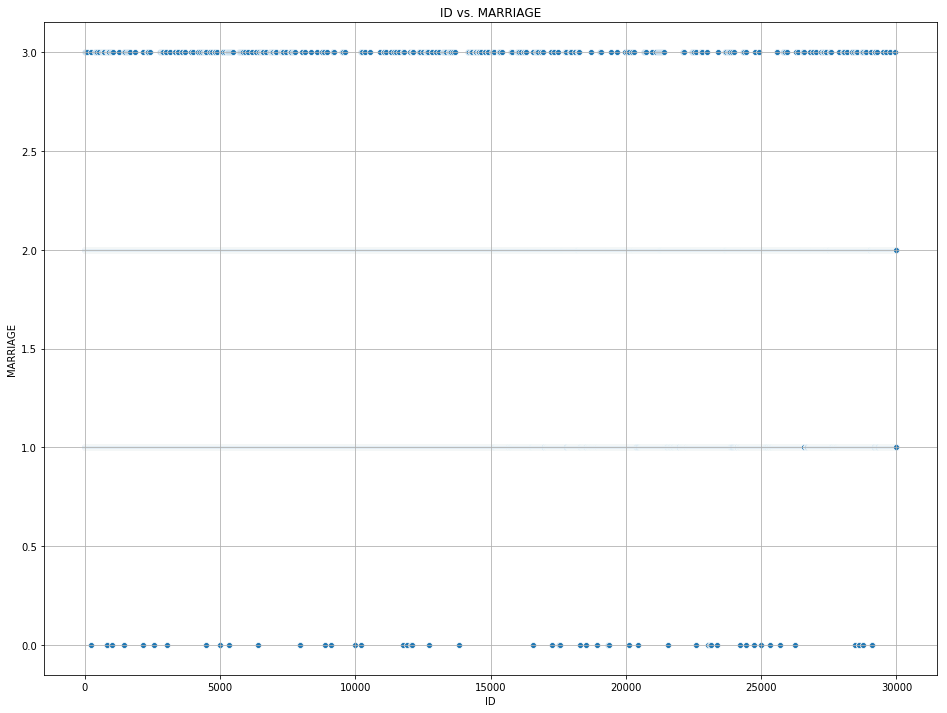

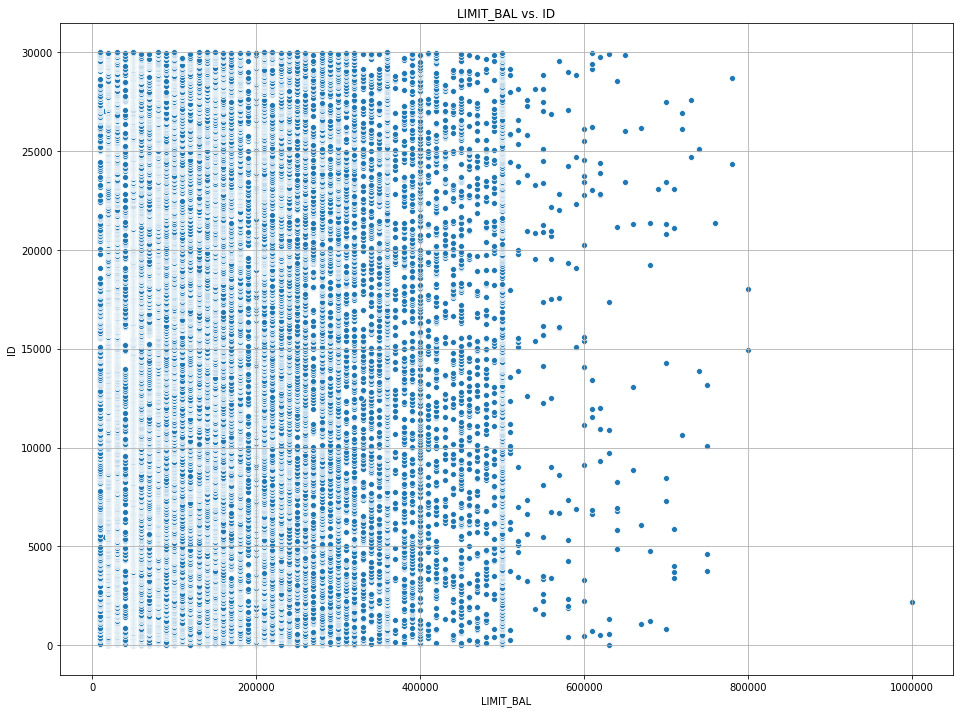

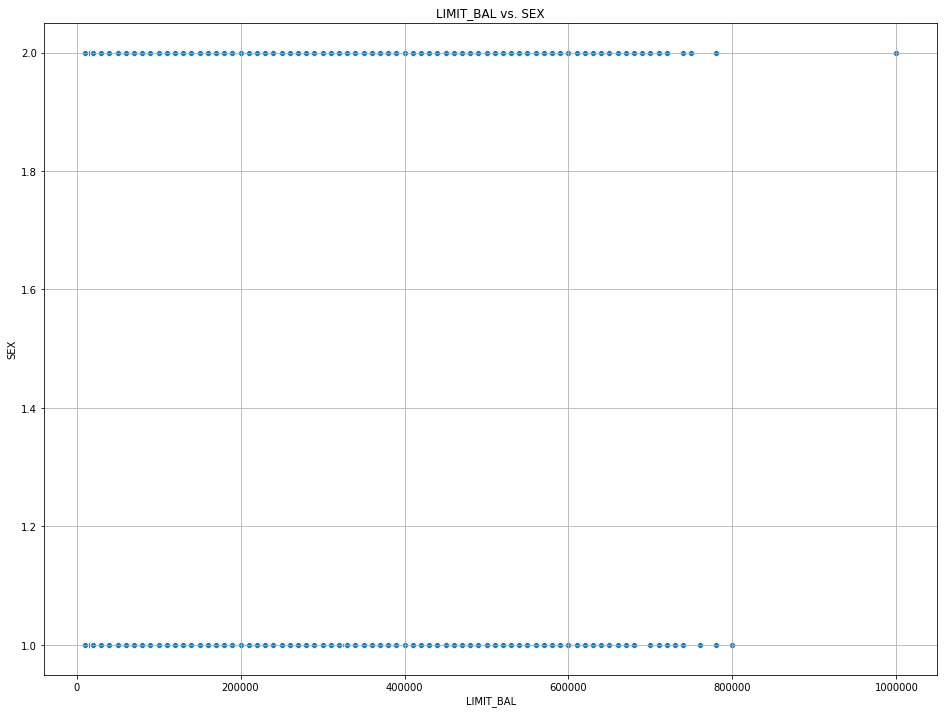

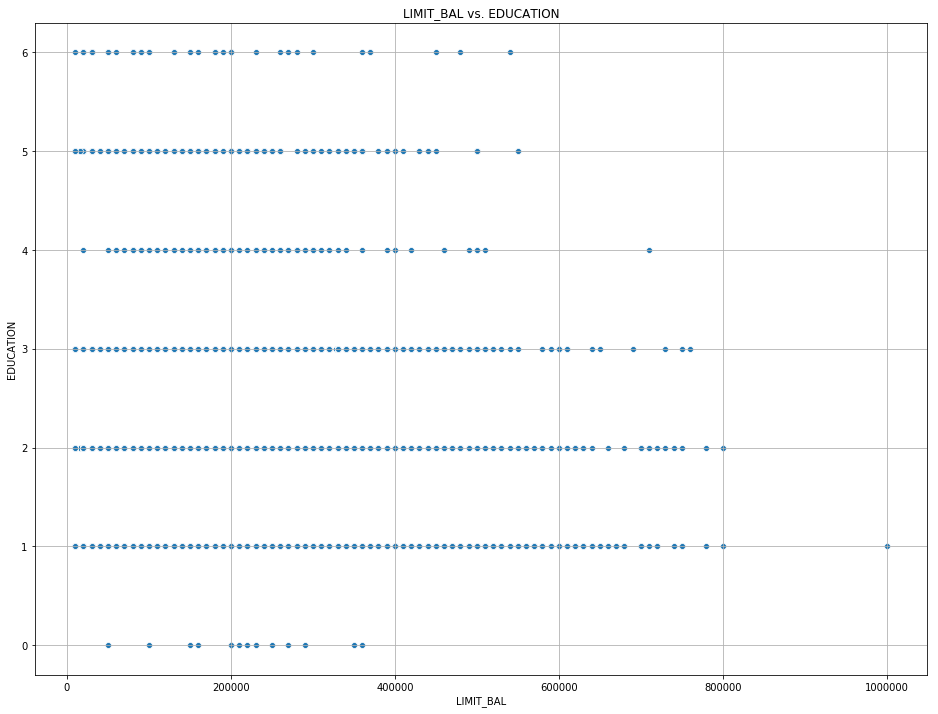

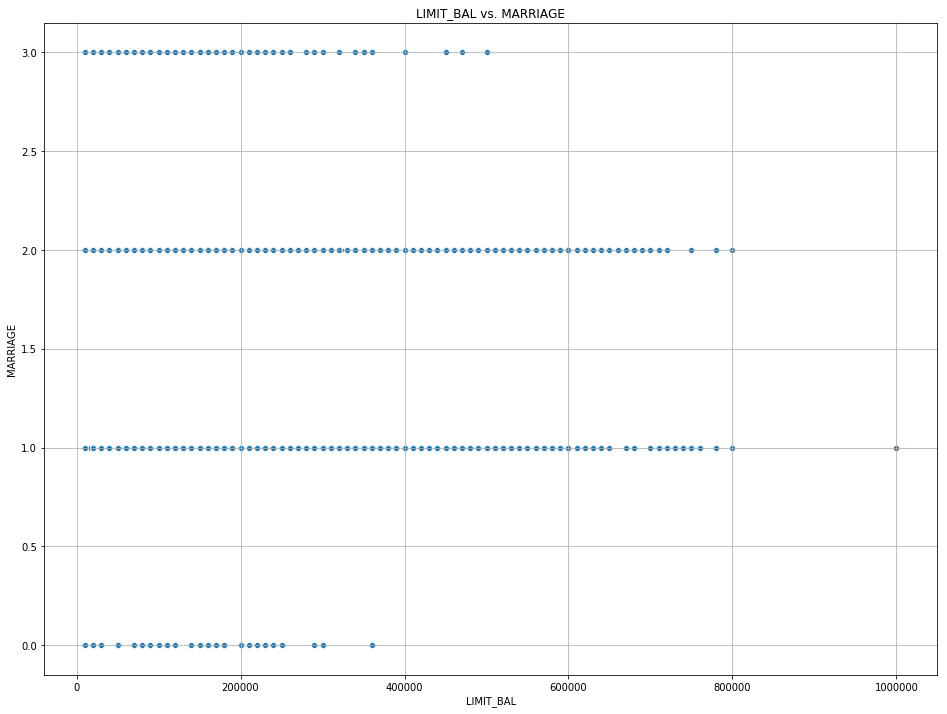

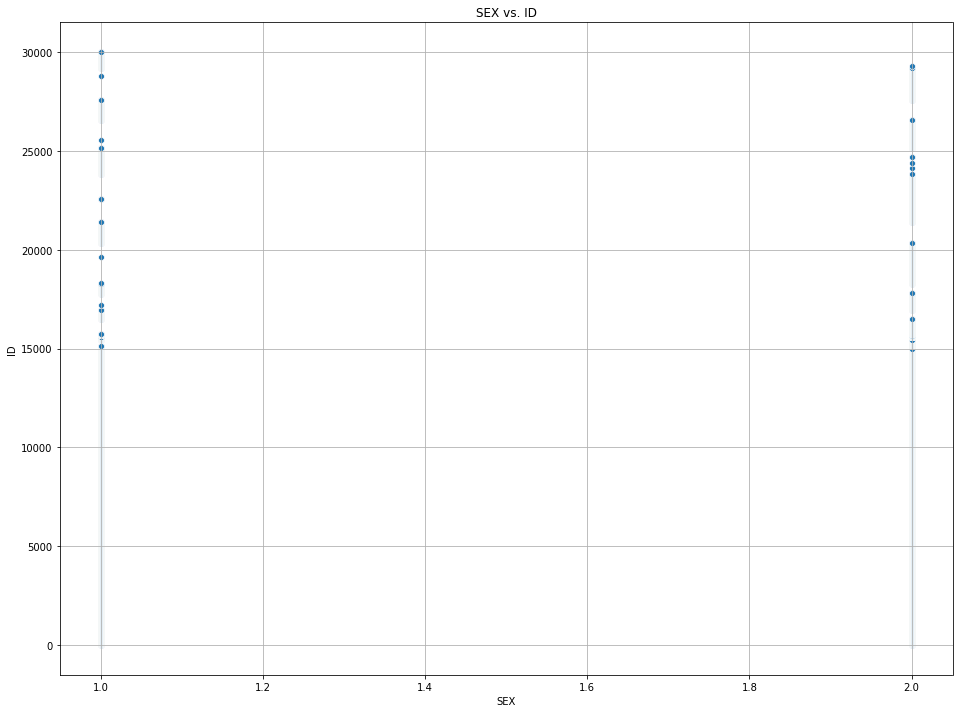

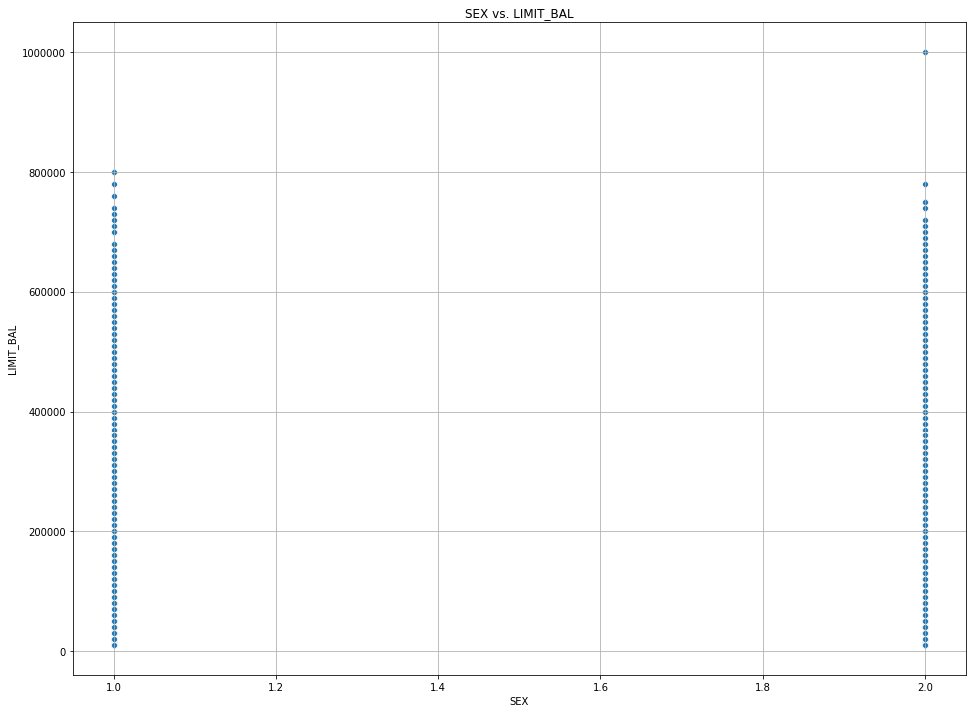

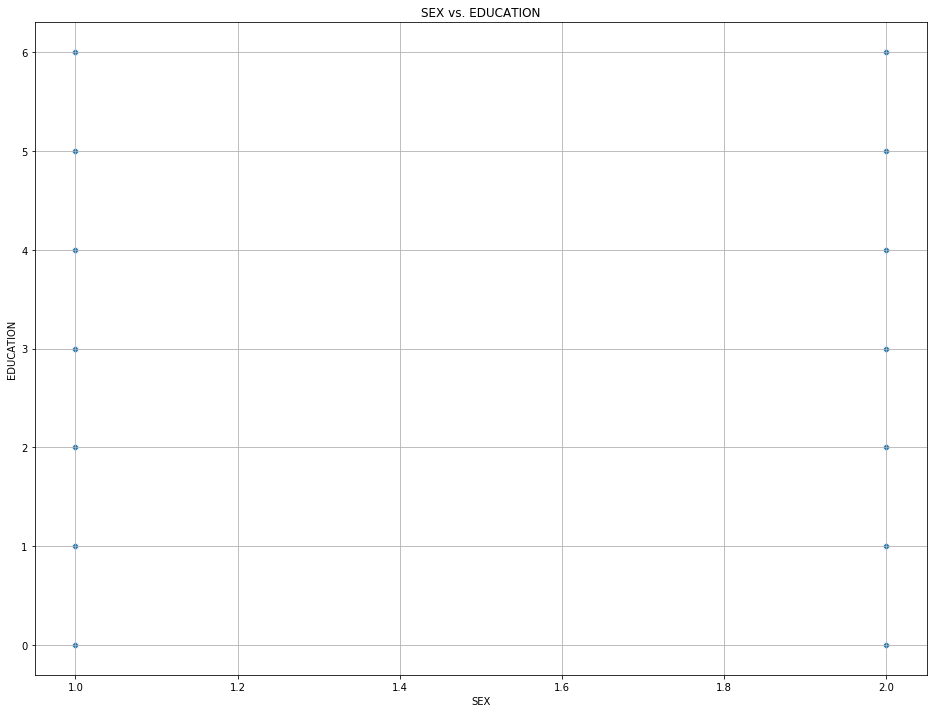

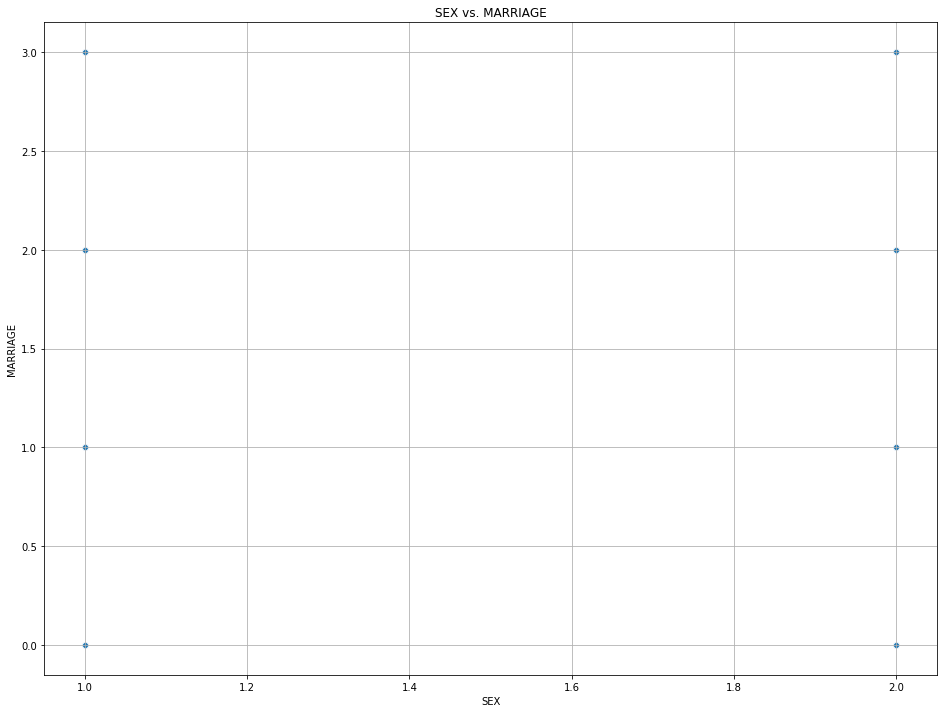

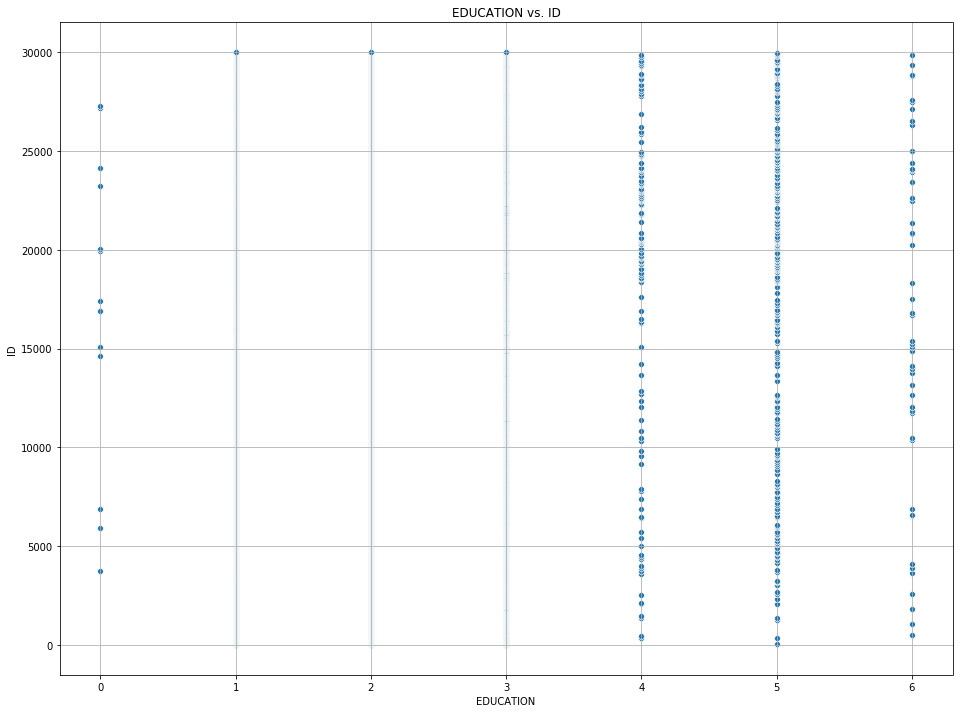

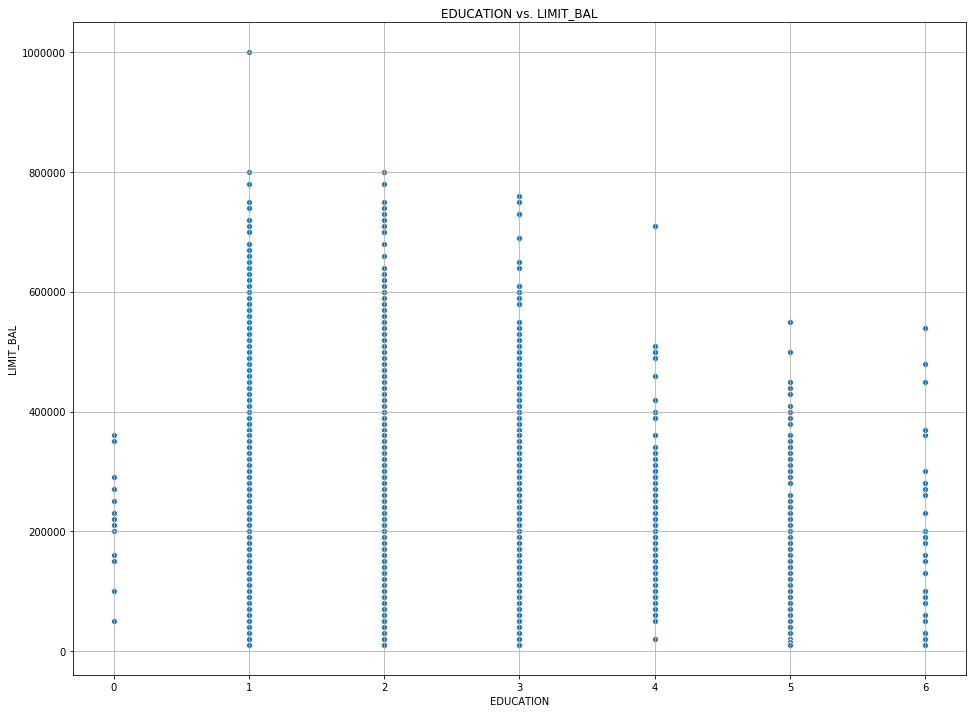

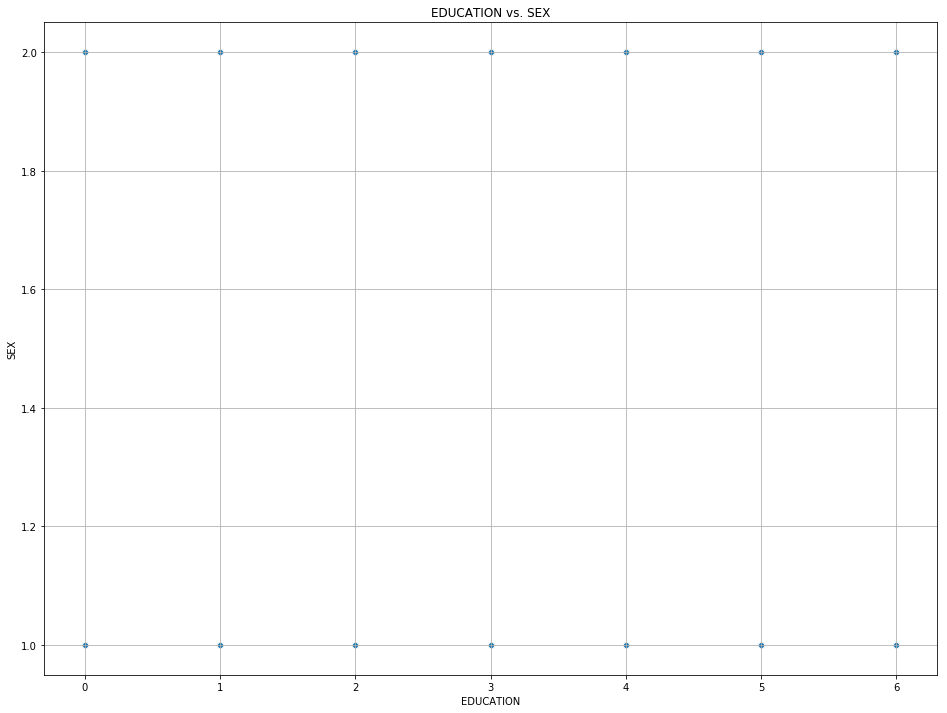

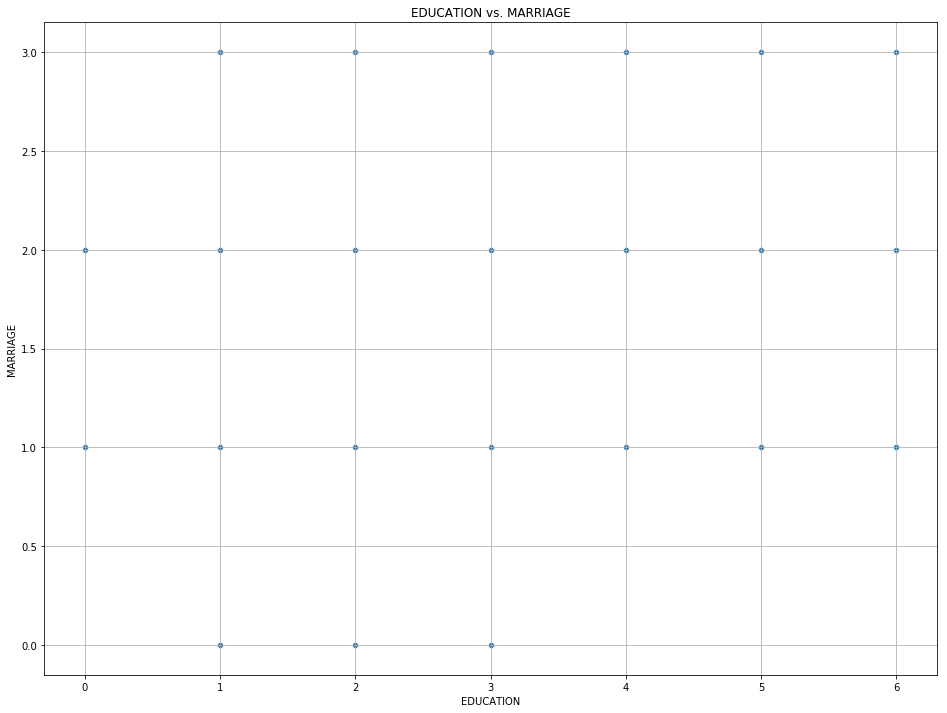

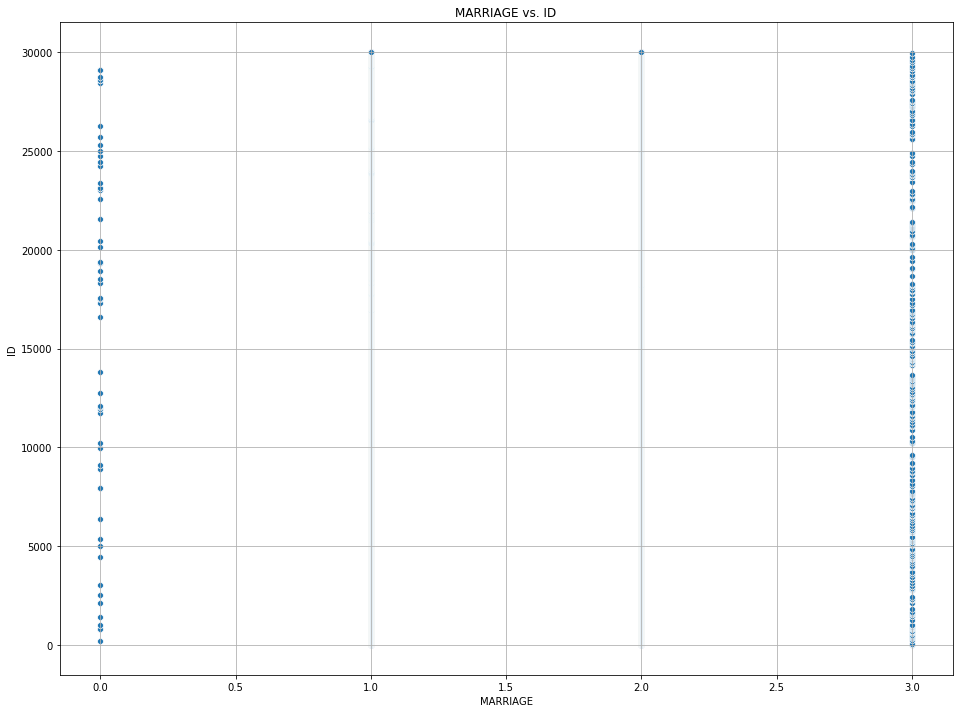

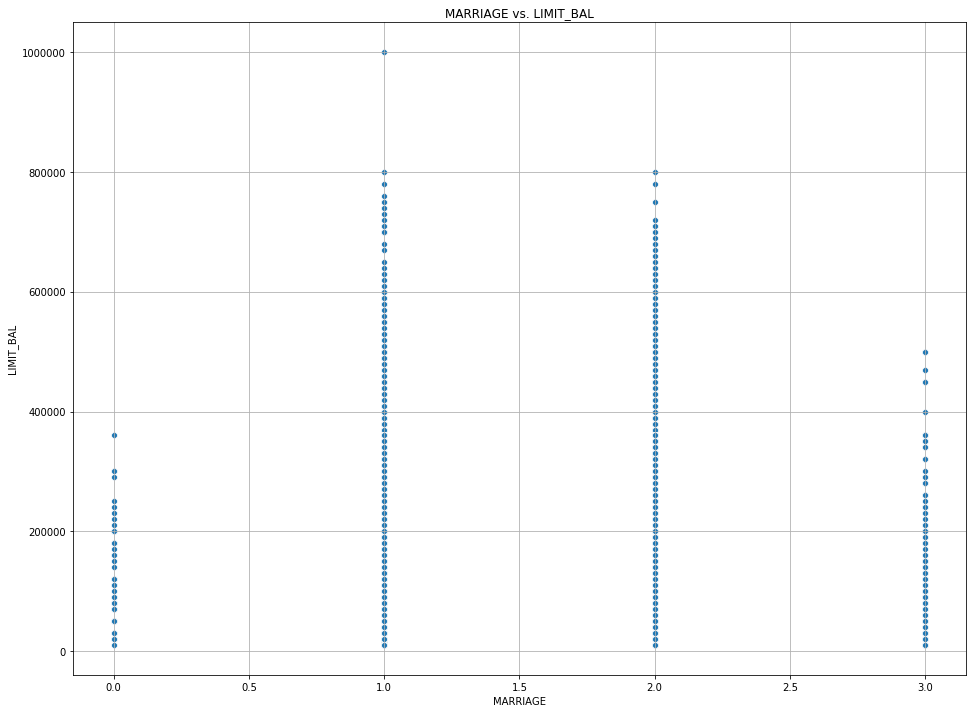

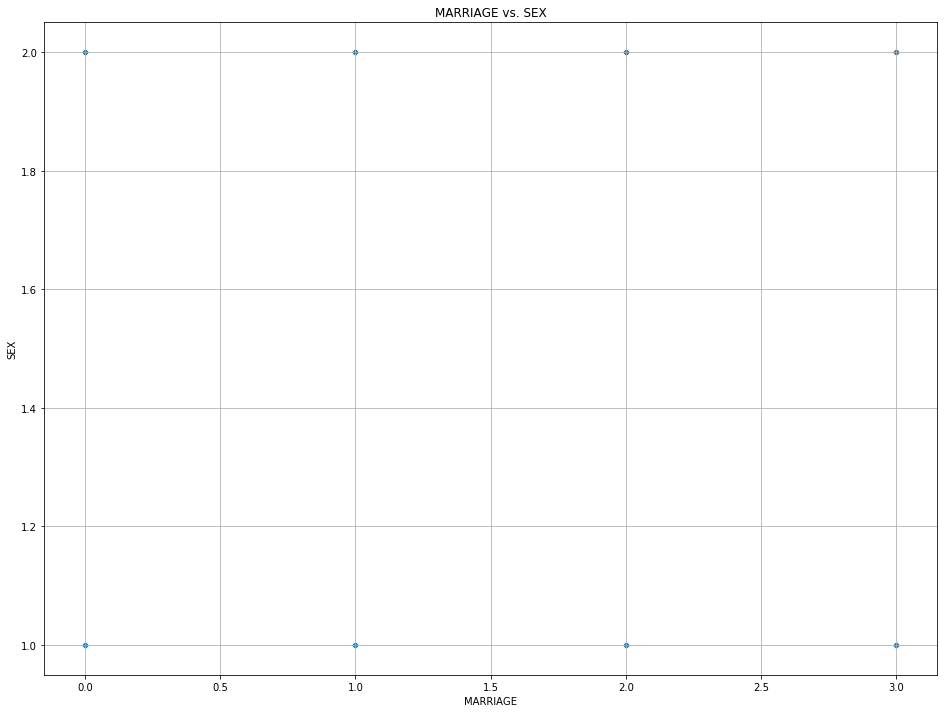

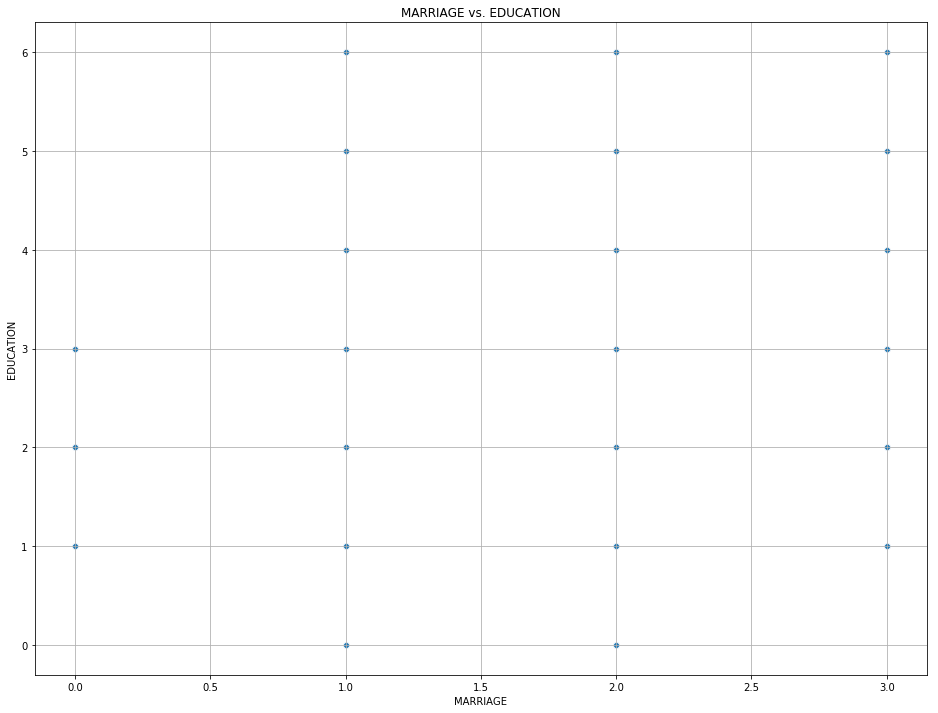

In [52]:
for c in df.columns[0:5]:
    for d in df.columns[0:5]:
        if c != d:
            plt.figure(figsize=(16,12))
            plt.grid()
            plt.title('{0} vs. {1}'.format(c, d))
            sns.scatterplot(x=df[c], y=df[d])
            plt.show();